Importing necessary moduls

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import kaggle
import zipfile

Download dataset with Kaggle API

In [3]:
!kaggle datasets download -d dheemanthbhat/stack-overflow-annual-developer-survey-2022


  0%|          | 0.00/11.7M [00:00<?, ?B/s]
  9%|▊         | 1.00M/11.7M [00:04<00:50, 223kB/s]
 17%|█▋        | 2.00M/11.7M [00:08<00:40, 253kB/s]
 26%|██▌       | 3.00M/11.7M [00:11<00:32, 283kB/s]
 34%|███▍      | 4.00M/11.7M [00:15<00:28, 282kB/s]
 43%|████▎     | 5.00M/11.7M [00:18<00:24, 293kB/s]
 51%|█████     | 6.00M/11.7M [00:20<00:16, 354kB/s]
 60%|█████▉    | 7.00M/11.7M [00:22<00:12, 399kB/s]
 68%|██████▊   | 8.00M/11.7M [00:24<00:09, 420kB/s]
 77%|███████▋  | 9.00M/11.7M [00:26<00:06, 449kB/s]
 85%|████████▌ | 10.0M/11.7M [00:27<00:03, 534kB/s]
 94%|█████████▎| 11.0M/11.7M [00:28<00:01, 612kB/s]
100%|██████████| 11.7M/11.7M [00:30<00:00, 615kB/s]
100%|██████████| 11.7M/11.7M [00:30<00:00, 409kB/s]


Unzip dataset

In [4]:
zipfile_name = 'stack-overflow-annual-developer-survey-2022.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

Set some options

In [17]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

Create dataframe

In [75]:
df = pd.read_csv('survey_results_public.csv')

In [19]:
df.sample(4)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
48056,48057,"I used to be a developer by profession, but no...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","School (i.e., University, College, etc);On the...",NaN,NaN,14,8,Product manager,NaN,NaN,Ask developers I know/work with,New Zealand,NaN,NaN,NaN,HTML/CSS;JavaScript;Kotlin;TypeScript,Go,DynamoDB;PostgreSQL,PostgreSQL;Redis,AWS,NaN,Node.js;React.js,Node.js;React.js,NaN,NaN,Kubernetes;npm;Yarn,Kubernetes;Yarn,IntelliJ;Visual Studio Code,IntelliJ;Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),Linux-based;Windows Subsystem for Linux (WSL),Git,Command-line,NaN,NaN,Confluence,Confluence,Slack,Slack,Indifferent,Stack Overflow,A few times per month or weekly,No,NaN,"No, not really",25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,None of the above,Yes,Independent contributor,11.0,Strongly agree,Disagree,Agree,Neither agree nor disagree,Agree,Agree,Disagree,3-5 times a week,6-10 times a week,1-2 times a week,15-30 minutes a day,60-120 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Appropriate in length,Easy,NaN
9108,9109,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Bootstrapping a business,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Online books;How...,NaN,40,30,DevOps specialist,"10,000 or more employees",I have some influence,Start a free trial,United States of America,USD\tUnited States dollar,155000.0,Yearly,Bash/Shell;C;C++;HTML/CSS;Java;JavaScript;Python,Go;JavaScript;Python,CouchDB;DynamoDB;PostgreSQL;Redis,DynamoDB;Redis,AWS;DigitalOcean;Google Cloud;VMware,AWS;DigitalOcean;VMware,jQuery;Node.js;React.js,React.js,React Native,Electron;React Native,Docker;Terraform,Docker;Kubernetes;Terraform,Android Studio;Atom;Eclipse;Notepad++;Vim;Visu...,Atom;Notepad++;Vim,Linux-based;Windows;Windows Subsystem for Linu...,Linux-based;Windows;Windows Subsystem for Linu...,Git,Command-line,NaN,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Indifferent,Stack Overflow,A few times per month or weekly,Not sure/can't remember,NaN,"No, not really",45-54 years old,Man,No,Straight / Heterosexual,White,None of the above,"Or, in your own words:",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,155000.0
8575,8576,I am learning to code,"Student, full-time",NaN,NaN,"Secondary school (e.g. American high school, G...","School (i.e., University, College, etc)",NaN,NaN,3,NaN,NaN,NaN,NaN,Ask developers I know/work with,Belgium,NaN,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PowerShell;SQL,C;C++;HTML/CSS;Java;JavaScript;Kotlin;PHP;Powe...,Microsoft SQL Server;MySQL,Micr

Create two visualization function

In [11]:
def plot_df(df,column,color):
   data = df[column].value_counts()
   keys = df[column].value_counts().keys()
   percent = (data/sum(data))*100
   txt = [str(round(i,2))+'%' for i in percent] 
   fig = px.bar(y=keys,x= data, text= txt)
   fig.update_traces(textposition='outside',marker=dict(color=color))
   fig.show()

In [74]:
def plot_df2(df,column,color):
   num = 0
   str_list = []
   for i in df[column]:
      num = num + 1
      if pd.isnull(i):
         continue
      data = i.split(";")
      for j in data:
         str_list.append(j)
   newdf = pd.DataFrame(str_list, columns=[column])
   data = newdf[column].value_counts()
   keys = newdf[column].value_counts().keys()
   percent = (data/df[column].notnull().sum())*100
   txt = [str(round(i,1))+'%' for i in percent] 
   fig = px.bar(y=keys,x= data, text= txt)
   fig.update_traces(textposition='outside',marker=dict(color=color))
   fig.show()

At what companies size do developers get the paid most

In [76]:
df['PlatformHaveWorkedWith'].value_counts()
df['ConvertedCompYearly'].value_counts()

ConvertedCompYearly
150000.0    393
200000.0    362
120000.0    341
63986.0     304
100000.0    279
           ... 
76472.0       1
1368.0        1
104952.0      1
3648.0        1
110245.0      1
Name: count, Length: 7909, dtype: int64

In [72]:
df = df[['OrgSize', 'ConvertedCompYearly']].dropna()
company_comp_data = df.groupby('OrgSize')['ConvertedCompYearly'].median().reset_index()
sorted_data = company_comp_data.sort_values('ConvertedCompYearly', ascending=False)
fig = px.bar(
    sorted_data,
    x='OrgSize',
    y='ConvertedCompYearly',
    text='ConvertedCompYearly',  
    labels={'OrgSize': 'Company Size'},
    title='Top-Paying Companies by Company Size'
)
fig.update_traces(marker_color='royalblue', textposition='outside')
fig.update_layout(
    xaxis_title='Company Size',
    yaxis_title='Median Yearly Compensation',
    showlegend=False,
    height=600  
)
fig.show()

How much does remote working matter to employees?

In [77]:
df['RemoteWork'].value_counts()

RemoteWork
Fully remote                            25341
Hybrid (some remote, some in-person)    25021
Full in-person                           8596
Name: count, dtype: int64

In [78]:
plot_df(df,'RemoteWork','black')

How does coding experirnce affect the level of the pay?

In [79]:
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
experience_groups = df.groupby('YearsCode')['CompTotal'].median()
experience_groups

YearsCode
1.0      39000.0
2.0      37440.0
3.0      45000.0
4.0      53000.0
5.0      50000.0
6.0      58000.0
7.0      62000.0
8.0      65000.0
9.0      72000.0
10.0     74000.0
11.0     80000.0
12.0     80000.0
13.0     75000.0
14.0     82000.0
15.0     80000.0
16.0     78000.0
17.0     90000.0
18.0     85000.0
19.0     85000.0
20.0     90000.0
21.0    100000.0
22.0     98000.0
23.0    105500.0
24.0    108000.0
25.0    100000.0
26.0    120000.0
27.0    105000.0
28.0    114000.0
29.0    120000.0
30.0     97135.0
31.0     95000.0
32.0     89500.0
33.0    106000.0
34.0    110000.0
35.0    107000.0
36.0    120000.0
37.0    100000.0
38.0    100000.0
39.0    125000.0
40.0    120000.0
41.0    125000.0
42.0    136000.0
43.0    120000.0
44.0    130000.0
45.0    133500.0
46.0    125500.0
47.0     78000.0
48.0    140000.0
49.0    150000.0
50.0    100000.0
Name: CompTotal, dtype: float64

In [80]:
experience_ranges = [(0, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30), (31, float('inf'))]
x_labels = [f'{start}-{end} Years' for start, end in experience_ranges]
median_compensation = []
for start, end in experience_ranges:
    subset = df[(df['YearsCode'] >= start) & (df['YearsCode'] <= end)]
    median_compensation.append(subset['CompTotal'].median())
formatted_compensation = [f'${round(val):,}' for val in median_compensation]
fig = px.bar(x=x_labels, y=median_compensation, text=formatted_compensation)
fig.update_layout(
    title='Coding Experience vs. Median Compensation',
    xaxis_title='Years of Coding Experience',
    yaxis_title='Median Compensation',
    xaxis=dict(tickangle=-45),
    showlegend=False 
)
fig.show()

What's the most popular method of learning to code?

In [81]:
df['LearnCode'].value_counts()

LearnCode
School (i.e., University, College, etc)                                                                                                                                                                                      3669
Other online resources (e.g., videos, blogs, forum)                                                                                                                                                                          3292
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                                           2873
Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                                                                  2697
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e

In [82]:
plot_df2(df,'LearnCode','green')

Are you more likely to get a job as a developer if you have a master's degree?

In [83]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30276
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15486
Some college/university study without earning a degree                                 9326
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7904
Associate degree (A.A., A.S., etc.)                                                    2236
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2169
Primary/elementary school                                                              1806
Something else                                                                         1247
Professional degree (JD, MD, etc.)                                                     1121
Name: count, dtype: int64

In [84]:
plot_df(df,'EdLevel','blue')

Country

In [42]:
df['Country'].value_counts()

Country
United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
                                                        ...  
Monaco                                                      1
Djibouti                                                    1
Seychelles                                                  1
Solomon Islands                                             1
Saint Kitts and Nevis                                       1
Name: count, Length: 180, dtype: int64

In [45]:
plot_df(df,'Country','blue')

Types of developers

In [46]:
df['DevType'].value_counts()

DevType
Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7142
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5301
Developer, front-end                                                                                                                    

In [85]:
plot_df2(df,'DevType','yellow')

Language have worked with

In [86]:
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                              1250
Python                                                                                       962
HTML/CSS;JavaScript                                                                          914
HTML/CSS;JavaScript;PHP;SQL                                                                  745
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                        570
                                                                                            ... 
C#;Java;JavaScript;PHP;PowerShell;SQL;TypeScript                                               1
C++;HTML/CSS;JavaScript;Python;Solidity;SQL                                                    1
Dart;Haskell;HTML/CSS;Java;R;SQL;TypeScript                                                    1
Bash/Shell;C;C#;Go;HTML/CSS;Java;JavaScript;Lua;Perl;PHP;Python;Ruby;Rust;SQL;TypeScript       1
C#;Java

In [92]:
plot_df2(df,'LanguageHaveWorkedWith','orange')

Genders

In [88]:
 
gender_data = df[df['Gender'].isin(['Man', 'Woman'])]


gender_data = gender_data['Gender'].value_counts()

(-1.0999998850722355,
 1.099999715239278,
 -1.0999996784132848,
 1.0999999846863469)

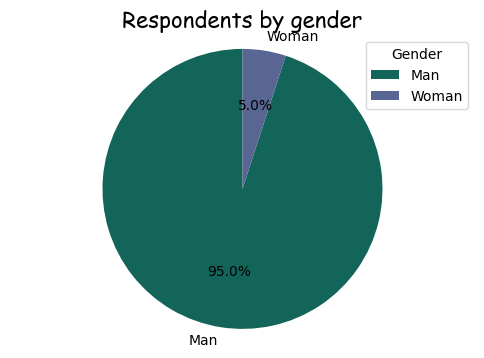

In [91]:
colors = ['#126558', '#596592']


fig, ax = plt.subplots(figsize=(6, 4))


ax.pie(gender_data, labels=gender_data.index, colors=colors, autopct='%1.1f%%', startangle=90)


ax.set_title('Respondents by gender', fontdict={'family': 'cursive', 'size': 16, 'weight': 'medium'})
ax.legend(title='Gender', loc='best')


ax.axis('equal')

